In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-27.00-22140'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  image_model=image_model)

tensorflow_version: 1.4.1


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


feature_name attention
image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt start


image_model: <melt.image.image_model.ImageModel object at 0x7fc0d4869290>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt duration: 4.02279996872
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-124.00-101680.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-124.00-101680.map start
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-124.00-101680.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-124.00-101680.map duration: 0.807884931564


In [ ]:
from deepiu.util import idf
from deepiu.util import vocabulary
vocabulary.init('/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt')
vocab = vocabulary.vocab
idf_weights = idf.get_idf()

document_frequency_path /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid/valid_refs_document_frequency.dill
idf 0, 1, 2, 100 0.0 3.39355707979e-07 0.0503116598971 7.53636427776


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 3ae8676c240549d93ce4c0b63af865458a24b811


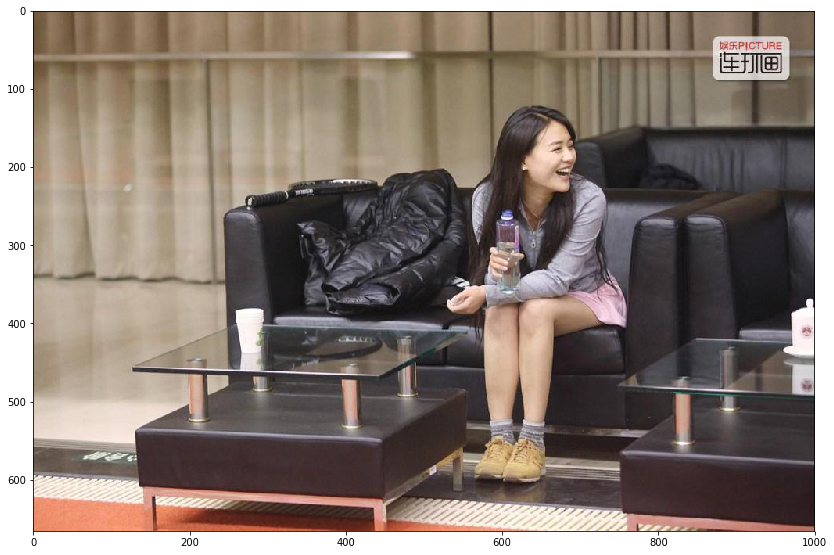

topwords of image:
0 坐在 0.713011|1 椅子 0.660536|2 沙发 0.626031|3 二郎腿 0.572899|4 吊瓶 0.559976|5 坐 0.555728|6 凳子 0.524084|7 修脚 0.499235|8 旁坐 0.497323|9 扯 0.487053|10 试鞋 0.482308|11 台子上 0.479743|12 泡泡糖 0.479081|13 诊脉 0.477596|14 座椅 0.475128|15 看一 0.473528|16 网吧 0.470552|17 毛线 0.468008|18 翘着 0.463519|19 候车室 0.458697|20 观众席 0.454858|21 弹琴 0.449555|22 懒人 0.447709|23 室内 0.446924|24 递酒 0.446137|25 换 0.444903|26 脸旁 0.443549|27 引路 0.441813|28 盘坐 0.440761|29 乒乓球桌 0.436615|30 简单 0.434368|31 铁栅栏 0.429814|32 脚拿书 0.426435|33 盘 0.425839|34 走廊 0.42582|35 舒适 0.42414|36 候车厅 0.423895|37 跑步机 0.422563|38 霜 0.420957|39 休息室 0.415676|40 服务台 0.413497|41 按摩 0.410565|42 透 0.406013|43 仓库 0.404674|44 跷 0.402931|45 药膏 0.401748|46 用脚 0.39792|47 绑带 0.394084|48 房檐 0.393282|49 缆车 0.393169|50 长凳 0.392843|51 扑克 0.392528|52 文胸 0.392067|53 手托 0.391451|54 更 0.389236|55 搽 0.388267|56 芒果 0.38815|57 腿 0.388115|58 猜 0.387919|59 直播 0.386715|60 蹲 0.38626|61 车库 0.386218|62 拟 0.383582|63 腕 0.383331|64 网帽 0.383049|65 月 0.38278|66 栅栏 0.3

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.365 seconds.
Prefix dict has been built succesfully.


手机
sim: [ 0.2712535]
idf sim [ 0.97840941]
text(q for exit): 瓶子
瓶子
sim: [ 0.17739064]
idf sim [ 0.90556961]
text(q for exit): 杯子
杯子
sim: [ 0.21218619]
idf sim [ 0.9771536]


In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  # Size, in inches, of the output images.
  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  print('idf topwords of image:')
  i = 0
  idf_scores = [score * idf_weights[wid] for score, wid in zip(scores, word_ids)]
  l = sorted(zip(idf_scores, word_ids), reverse=True)
  for score, word_id in l:
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))
    print('idf sim', idf_weights[vocab.id(text)] * predictor.predict([image], [text2ids.text2ids(text)]))